# ANÁLISE INDUSTRIAL

Este Notebook é um documento dinâmico para **análise das indústrias** nos **espaços metropolitanos Brasileiros** segundo seu **nível de tecnologia**. O documento compõe parte dos estudos do projeto de identificação da **capacidade de aprendizado e inovação** nos contextos econômicos dos espaços metropolitanos brasileiros. Outros notebooks dessa série envolvem
análises sobre os **serviços, segundo sua intensidade de conhecimento aplicado**, a participação de **pessoal técnico-científico** no mercado de trabalho; a contratação de **pessoal com alto nível de formação** (mestrado e doutorado); a estrutura científica, por **métricas de produção da pós-graduação**; a estrutura de **cooperação formal entre organizações** do sistema de inovação.

Neste documento, são apresentados gráficos e tabelas que servirão como elemento de análise e que acompanharão, como referência externa,  artigos e outros tipos de comunicações dos resultados da pesquisa. Os produtos tabulares e gráficos foram desenvolvidos por funções, na linguagem Python, que se encontram armazenadas no subpacote analytics_industries do pacote app_rais, onde o código-fonte pode ser consultado para fins de validação e replicação.


De maneira geral, os produtos analíticos expostos a seguir permitem identificar:

* o pessoal ocupado na indústria e a sua proporção entre diferentes níveis tecnológicos em cada espaço metropolitano;
* a concentração metropolitana do pessoal ocupado no parque industrial de cada unidade da federação;
* a evolução do pessoal ocupado nas indústrias, por nível tecnológico, entre 2007 e 2017, em cada espaço metropolitano e no seu total;
* a evoluçaõ da participação relativa do pessoal ocupado nas indústrias, entre 2007 e 2017, em cada espaço metropolitano e no seu total.

Os dados sob análise são oriundos do [servidor de Microdados da Relação Anual de Informações Sociais - RAIS](http://pdet.mte.gov.br/microdados-rais-e-caged). Detalhes técnicos sobre os registros dessa base podem ser encontrados no notebook desta série dedicado à coleta e tratamento de dados. Importa ressaltar aqui que, com vistas à concisão textual, o a soma dos registros de trabalho formal é chamada aqui de pessoal ocupado. A rigor, esse não é sempre o caso, uma vez um mesmo trabalhador pode ter dois registros de trabalho. Isso significa que não há uma correspondência perfeita entre o termo pessoal ocupado utilizado neste documento e o conceito de pessoal ocupado, tal como aquele presente em estudos consagrados sobre o mercado de trabalho, como a Pesquisa Nacional por Amostra Domiciliar Contínua - PNAD Contínua, do Instituto Brasileiro de Geografia e Estatística.

## Preparação do Notebook para Análise e Interatividade

Com a finalidade de desenvolverr os gráficos e tabelas neste notebook, os seguintes pacotes e módulos Python foram importados e configurados:

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 200
import plotly.express as px
import app_rais.dicts_constants as dc
import app_rais.analytics_industries as ind
import json
import geopandas as gpd

## Concentração Metropolitana  de Indústrias segundo Níveis Tecnológicos  

**Tabela 1 - Pessoal Formalmente Ocupado nos Setores Industriais Segundo Nível Tecnológico em 2018**

In [6]:
df_ind = ind.ind_level_comparison_table(
    year=2018
    , list_ufs=['PR']
    , exclude_territory_starts_with='Demais'
)

In [10]:
df = df_ind.reset_index().drop(columns='UF')

In [14]:
df['Território'] = df['Território'].astype('object')

In [16]:
df['Nível Tecnológico'] = df['Nível Tecnológico'].astype('object') 

In [19]:
df

Território       Nível Tecnológico     PO  PO estadual  \
0      RM de Apucarana         High-technology    447        13142   
1      RM de Apucarana  Medium-high-technology   1776       115857   
2      RM de Apucarana   Medium-low-technology   1500       109630   
3      RM de Apucarana          Low-technology  12411       370488   
4   RM de Campo Mourão         High-technology    370        13142   
5   RM de Campo Mourão  Medium-high-technology    861       115857   
6   RM de Campo Mourão   Medium-low-technology   1239       109630   
7   RM de Campo Mourão          Low-technology  13435       370488   
8       RM de Cascavel         High-technology    132        13142   
9       RM de Cascavel  Medium-high-technology   5077       115857   
10      RM de Cascavel   Medium-low-technology   4313       109630   
11      RM de Cascavel          Low-technology  28782       370488   
12      RM de Curitiba         High-technology   6071        13142   
13      RM de Curitiba  Medium-high-technology  64471       115857   
14      RM de Curitiba   Medium-low-technology  48195       109630   
15      RM de Curitiba          Low-technology  52822       370488   
16      RM de Londrina         High-technology   1224        13142   
17      RM de Londrina  Medium-high-technology   9343       115857   
18      RM de Londrina   Medium-low-technology  10932       109630   
19      RM de Londrina          Low-technology  46267       370488   
20       RM de Maringá         High-technology    757        13142   
21       RM de Maringá  Medium-high-technology   7588       115857   
22       RM de Maringá   Medium-low-technology   8637       109630   
23       RM de Maringá          Low-technology  32630       370488   
24        RM de Toledo         High-technology   3768        13142   
25        RM de Toledo  Medium-high-technology   2132       115857   
26        RM de Toledo   Medium-low-technology   2769       109630   
27        RM de Toledo          Low-technology  24839       370488   
28      RM de Umuarama         High-technology     55        13142   
29      RM de Umuarama  Medium-high-technology    576       115857   
30      RM de Umuarama   Medium-low-technology   1116       109630   
31      RM de Umuarama          Low-technology  19137       370488   

    Participação Metropolitana (%)  Participação Estadual (%)  
0                             2.77                       3.40  
1                            11.01                       1.53  
2                             9.30                       1.37  
3                            76.92                       3.35  
4                             2.33                       2.82  
5                             5.41                       0.74  
6                             7.79                       1.13  
7                            84.47                       3.63  
8                             0.34                       1.00  
9                            13.25                       4.38  
10                           11.26                       3.93  
11                           75.14                       7.77  
12                            3.54                      46.20  
13                           37.58                      55.65  
14                           28.09                      43.96  
15                           30.79                      14.26  
16                            1.81                       9.31  
17                           13.79                       8.06  
18                           16.13                       9.97  
19                           68.27                      12.49  
20                            1.53                       5.76  
21                           15.29                       6.55  
22                           17.41                       7.88  
23                           65.77                       8.81  
24                           11.25                      28.67  
25                            6.36   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Território                      32 non-null     object 
 1   Nível Tecnológico               32 non-null     object 
 2   PO                              32 non-null     int64  
 3   PO estadual                     32 non-null     int64  
 4   Participação Metropolitana (%)  32 non-null     float64
 5   Participação Estadual (%)       32 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.6+ KB


In [22]:
df.to_pickle('df_inds_rms.pkl')

## Evolução do Nível Tecnológico das Indústrias entre  2007 to 2017

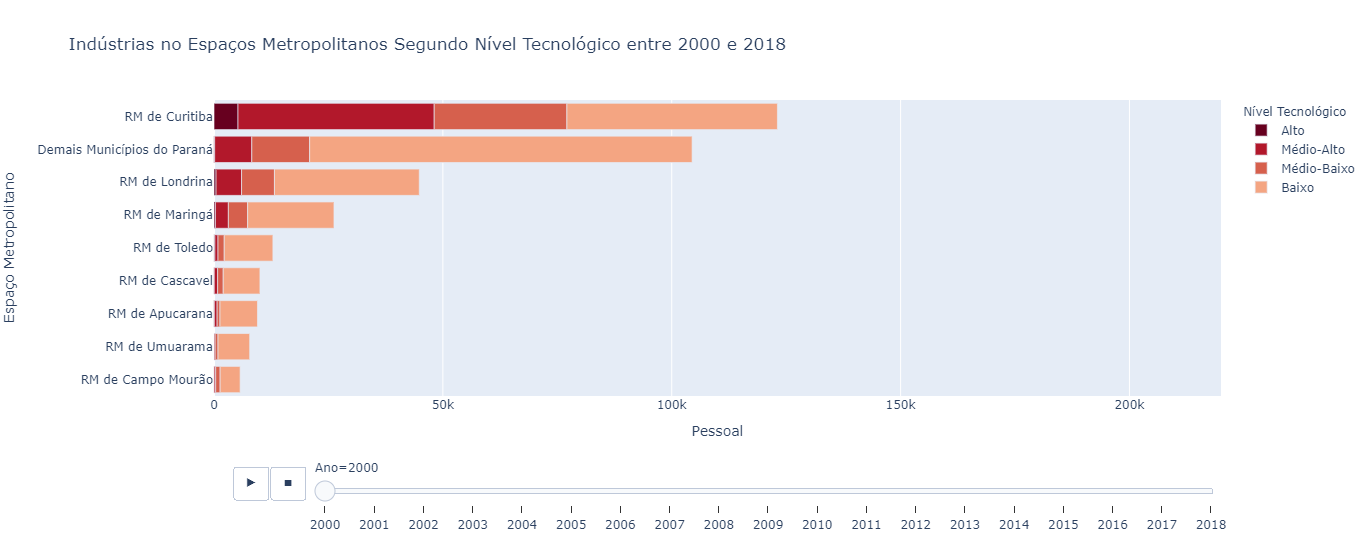

In [2]:
fig, df = ind.ind_tech_level_evolution_dynamic(
    list_years=list(range(2000,2019))
    , list_ufs=['PR']
    , range_x=220_000
    , list_tec_level=None  
    , relative=False
    , focus='Médio-Alto'     
#    , exclude_territory_starts_with='Demais'
    , list_include_territory=None
    , height=550
)
fig.show()

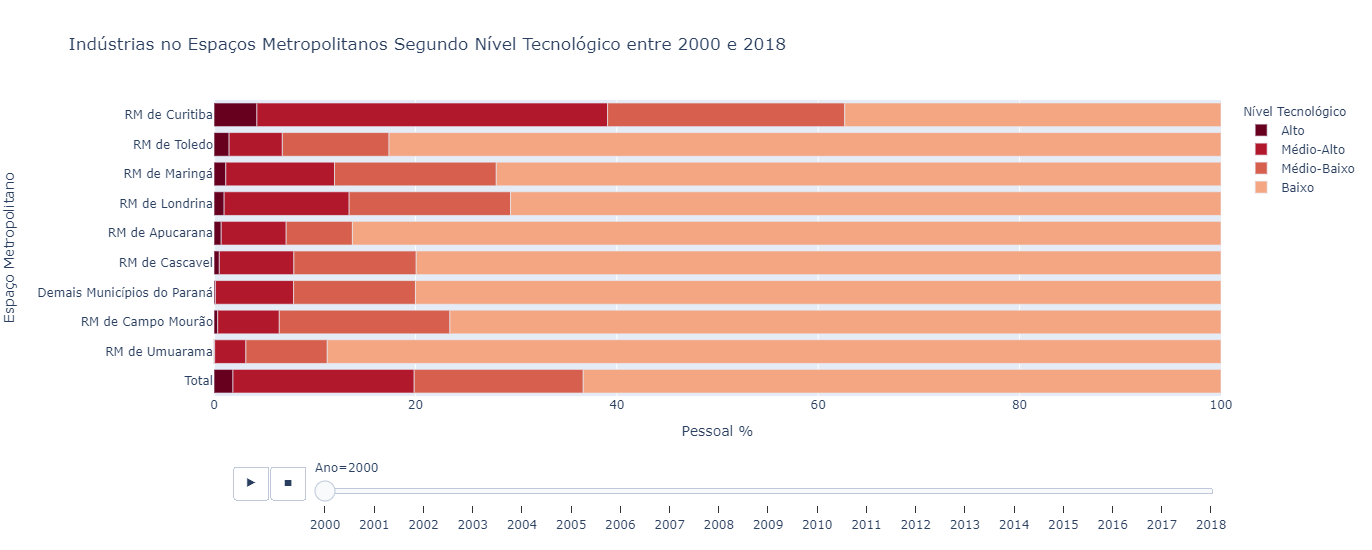

In [11]:
fig, df = ind.ind_tech_level_evolution_dynamic(
    list_years=list(range(2000,2019))
    , list_ufs=['PR']
    , range_x=220_000
    , list_tec_level=None  
    , relative=True
#    , focus='Médio-Alto'     
#    , exclude_territory_starts_with='Demais'
    , list_include_territory=None
    , height=550
)
fig.show()

**Tabela 2 - Evolução do Nível Tecnológico das Indústrias nos Espaços Metropolitanos Brasileiros entre 2007 e 2017**

In [12]:
df_evolution = ind.ind_tech_level_evolution_table(list_years=list(range(2000,2019)), total=False, save_feather=True)
df_evolution

2000   2001   2002   2003   2004  \
Espaço Metropolitano Nível Tecnológico                                      
RM de Apucarana      Alto                  68     98    123    168    207   
                     Médio-Alto           613    607    654    720    821   
                     Médio-Baixo          625    657    674    720    851   
                     Baixo               8196   8735  10152  10025  11461   
RM de Campo Mourão   Alto                  21     27    131    137    136   
                     Médio-Alto           349    319    365    485    579   
                     Médio-Baixo          967    933   1803   2027   2881   
                     Baixo               4370   5074   5430   5048   5874   
RM de Cascavel       Alto                  53     83     58     59     66   
                     Médio-Alto           743    888   1220   1532   1761   
                     Médio-Baixo         1219   1420   1554   1786   1956   
                     Baixo               8019   9788  11095  14090  16194   
RM de Curitiba       Alto                5244   4454   4452   4828   5173   
                     Médio-Alto         42864  42936  45032  44657  53403   
                     Médio-Baixo        28990  29905  30691  32984  35941   
                     Baixo              45992  46703  50181  51584  55368   
RM de Londrina       Alto                 451    502    568    632    957   
                     Médio-Alto          5567   5415   5951   5098   5932   
                     Médio-Baixo         7186   7508   8435   9196  10780   
                     Baixo              31639  32276  35641  35385  39176   
RM de Maringá        Alto                 307    434    639    331    557   
                     Médio-Alto          2830   3242   3590   3677   4599   
                     Médio-Baixo         4210   4591   4829   5190   7060   
                     Baixo              18862  20150  22400  22867  25362   
RM de Toledo         Alto                 193    184    372    800    908   
                     Médio-Alto           680    875    889    913    982   
                     Médio-Baixo         1363   1517   1580   1625   1763   
                     Baixo              10629  12314  13392  14469  17013   
RM de Umuarama       Alto                   5     12     31     21     39   
                     Médio-Alto           242    299    369    464    437   
                     Médio-Baixo          630    521   1218    978   1743   
                     Baixo               6919   7348  11432  12726  15061   

                                         2005   2006   2007   2008   2009  \
Espaço Metropolitano Nível Tecnológico                                      
RM de Apucarana      Alto                 214    263    333    411    483   
                     Médio-Alto           850    879   1093   1153   1235   
                     Médio-Baixo         1000   1238   1094   1319   1274   
                     Baixo              12518  14197  15154  15182  14759   
RM de Campo Mourão   Alto                 155    266    318    326    366   
                     Médio-Alto           432    372    501    652    588   
                     Médio-Baixo         2946   3174   3106   3161   3344   
                     Baixo               5752   5769   6603   7477   7665   
RM de Cascavel       Alto                  57    243    167    180    113   
                     Médio-Alto          1755   2107   2495   2875   3187   
                     Médio-Baixo         1959   2566   3082   3499   3669   
                     Baixo              16096  18120  20504  20928  21370   
RM de Curitiba       Alto                5350   6341   8608  10128  12335   
                     Médio-Alto         55460  57391  64145  66640  67780   
                     Médio-Baixo        36982  42987  46672  49539  49509   
                     Baixo              56251  57105  61010  61525  60586   
RM de Londrina       Alto           

**Figura 1 - Distribuição dos Empregos Indutriais entre Municípios da Região Metropolitana de Londrina em 2018**

In [22]:
territory = 'RM de Londrina'

df = pd.read_feather('app_rais/data/rais_dataframes/ufs_with_motropolises_2018.ftd')

df = df[(df['Território'] == territory) & (df['technology_industries'] != 'Without Classification')].groupby(['Cod Município','Município', 'technology_industries'], observed=True).sum()

df = df.pivot_table(columns=['technology_industries'], aggfunc='sum', index=['Cod Município','Município'], fill_value=0).droplevel(0, axis=1).rename_axis(columns={'technology_industries':''})

df.columns = df.columns.astype('object')

df['Total'] = df.sum(axis=1).values

df.rename(columns={'High-technology':'Alta', 'Medium-high-technology':'Média-Alta', 'Medium-low-technology':'Média-Baixa', 'Low-technology':'Baixa'}, inplace=True)

df.sort_values(by='Total', ascending=False, inplace=True)

df = df.reset_index()

gdf = gpd.read_file('dados/maps/shp/territorio/BR_Municipios_2019.shp')

gdf = gdf[gdf['CD_MUN'].isin(df['Cod Município'].values)]

long = gdf.dissolve(by='SIGLA_UF').centroid.x.values[0]

lat = gdf.dissolve(by='SIGLA_UF').centroid.y.values[0]

with open('app_territory/data/GeoJSON/RM_Londrina_MUN_2019.geojson') as file:
    json_mun = json.load(file)

fig = px.choropleth_mapbox(
    data_frame=df
    , geojson=json_mun
    , locations='Cod Município'
    , featureidkey="properties.CD_MUN"
    , color='Total'
    , color_continuous_scale="Viridis"
#    , range_color=(0, 12)
    , mapbox_style="carto-positron"
    , zoom=7.5
    , center = {"lat": lat, "lon": long}
    , opacity=0.5
    , hover_name='Município'
#    , labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Figura 2 - Distribuição dos Empregos Indutriais entre Municípios da Região Metropolitana de Maringá em 2018**

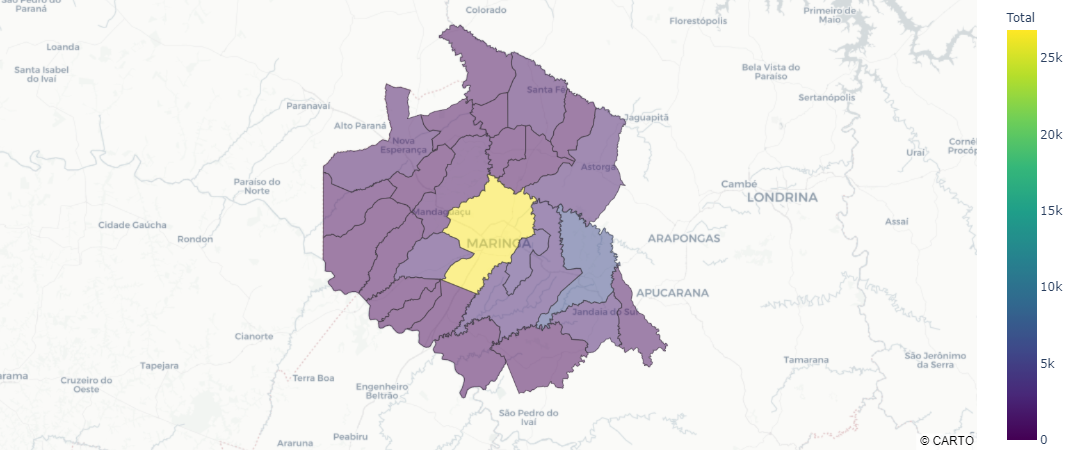

In [16]:
territory = 'RM de Maringá'

df = pd.read_feather('app_rais/data/rais_dataframes/ufs_with_motropolises_2018.ftd')

df = df[(df['Território'] == territory) & (df['technology_industries'] != 'Without Classification')].groupby(['Cod Município','Município', 'technology_industries'], observed=True).sum()

df = df.pivot_table(columns=['technology_industries'], aggfunc='sum', index=['Cod Município','Município'], fill_value=0).droplevel(0, axis=1).rename_axis(columns={'technology_industries':''})

df.columns = df.columns.astype('object')

df['Total'] = df.sum(axis=1).values

df.rename(columns={'High-technology':'Alta', 'Medium-high-technology':'Média-Alta', 'Medium-low-technology':'Média-Baixa', 'Low-technology':'Baixa'}, inplace=True)

df.sort_values(by='Total', ascending=False, inplace=True)

df = df.reset_index()

gdf = gpd.read_file('app_territory/data/shp/BR_Municipios_2019.shp')

gdf = gdf[gdf['CD_MUN'].isin(df['Cod Município'].values)]

long = gdf.dissolve(by='SIGLA_UF').centroid.x.values[0]

lat = gdf.dissolve(by='SIGLA_UF').centroid.y.values[0]

with open('app_territory/data/GeoJSON/RM_Maringa_MUN_2019.geojson') as file:
    json_mun = json.load(file)

fig = px.choropleth_mapbox(
    data_frame=df
    , geojson=json_mun
    , locations='Cod Município'
    , featureidkey="properties.CD_MUN"
    , color='Total'
    , color_continuous_scale="Viridis"
#    , range_color=(0, 12)
    , mapbox_style="carto-positron"
    , zoom=8
    , center = {"lat": lat, "lon": long}
    , opacity=0.5
    , hover_name='Município'
#                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Criação dos GeoJSONs Para o trabalho

In [116]:
gdf.to_file('app_territory/data/GeoJSON/RM_Maringa_MUN_2019.geojson', driver = "GeoJSON")